 Written by Federica B. Bianco @fedhere
 NYU CUSP PUI

 Assignment 1 Homework 4

 This is a skeleton & instruction notebook

-  GENERATE  100 samples of different sizes N (N>10 & N<2000) from each of 5 different distributions (500 samples in total), 
 _all with the same population mean_. Include a _Normal_, a _Poisson_, a _Binomial_, a _Chi-Squared_ distribution, and 1 more of your choice.                                       
-  For each sample plot the sample mean (dependent var.) against the sample size N (independent var.) (if you want you can do it with the sample standard deviation as well). 
-  Describe the behavior you see in the plots in terms of the law of large numbers.
-  PLOT the distributions of all sample means (together for all distributions). _Mandatory_: as a histogram. _Optional_: in any other way you think is convincing
 Extra Credit: FIT a gaussian to the distribution of means            

In [1]:
from __future__ import print_function
__author__= 'wz'
# this package sets up pretty plots
import seaborn
from scipy.optimize import curve_fit, minimize

import os
import io
import requests
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as plt
from pandas import Series, DataFrame
import json
from pandas.io.json import json_normalize
import sys
import scipy as sp

puidata= os.getenv("PUIDATA")
if puidata is None:
    os.environ["PUIDATA"] = "%s/PUIdata"%os.getenv("HOME")
    
try:
    import urllib2 as urllib
except ImportError:
    import urllib.request as urllib

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python2/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


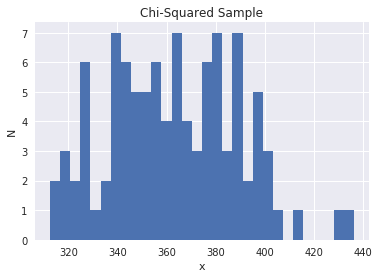

In [2]:
# 1. Chi-square 
np.random.seed(355)
mymean = 360
df = mymean
md1 = {}
md1['chisq'] = np.random.chisquare(df, size=100)
plt.hist(md1['chisq'], bins = 30)
plt.ylabel('N')
plt.xlabel('x')
plt.title ('Chi-Squared Sample')
plt.show()

### Figure 1: Chi sq distribution: mean = 360, N=100
This figure does not assemble a normal distribution as much. Although the mean, which is 360, lies in the middle of the graph. The distribution N doesn't peak there. Thus, this can be described as multi-mode. A sample size of 100 doesn't show a normal distribution of data on the graph as the Central Limit Theorem and the Law of Large Numbers suggest. However, I also tested a sample size of 10000, which resembles a very nice normal distribution shape. 

## let numpy calculate what the mean and stdev of this distribution are

In [3]:
print ("Chisq mean: %.2f, standard deviation: %.2f"%(md1['chisq'].mean(), md1['chisq'].std()))

Chisq mean: 362.95, standard deviation: 26.18


## Now let's do it for 100 Chisq distributions
we want distributions of different sizes (all integers between 10 and 2000)

In [4]:
size = (2000 / (np.array(range(1, 101)))).astype(int)
print (size, size.shape)


[2000 1000  666  500  400  333  285  250  222  200  181  166  153  142  133
  125  117  111  105  100   95   90   86   83   80   76   74   71   68   66
   64   62   60   58   57   55   54   52   51   50   48   47   46   45   44
   43   42   41   40   40   39   38   37   37   36   35   35   34   33   33
   32   32   31   31   30   30   29   29   28   28   28   27   27   27   26
   26   25   25   25   25   24   24   24   23   23   23   22   22   22   22
   21   21   21   21   21   20   20   20   20   20] (100,)


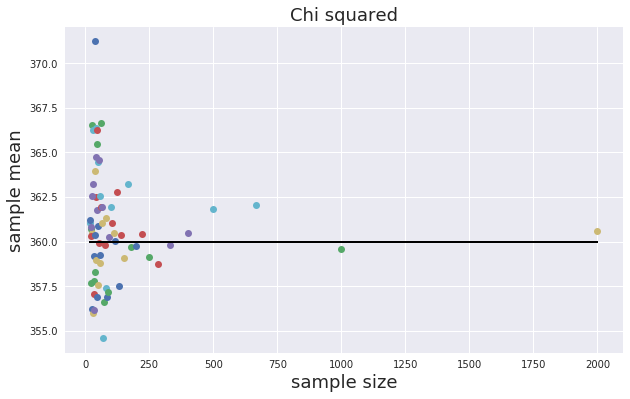

In [5]:

md1['chisq'] = {} 

for n in size:
    md1['chisq'][n] = np.random.chisquare(df, size = n)
    
md1['chisq']['means'] = {}
axchisq_mu_n = plt.figure(figsize=(10,6)).add_subplot(111)

for nn in md1['chisq']:
    if not type(nn) == str:
        md1['chisq']['means'][nn] = md1['chisq'][nn].mean()
        axchisq_mu_n.plot(nn, md1['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Chi squared', fontsize=18)
        axchisq_mu_n.plot([min(size), max(size)], [df, df], 'k')
plt.show()

# Figure 2: Chi square distribution: mean = 360, N=100, with different sample sizes
This figure does assemble a normal distribution to certain extent. The mean, which is 360, lies in the middle of the graph. The distribution peaks there, though does not closely assemble the normal distributin. A larger sample size instead of 100 would resembles a very nice normal distribution shape. 


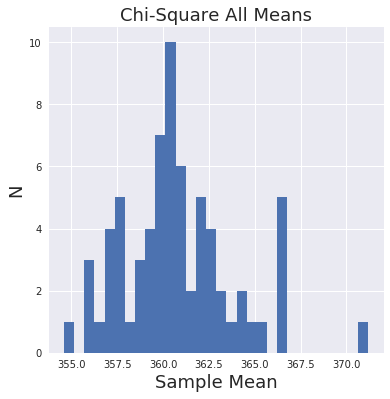

In [6]:
allmeans = list(md1['chisq']['means'].values())

plt.figure(figsize=(6, 6))
plt.hist(allmeans,bins=30)
plt.xlabel('Sample Mean', fontsize = 18)
plt.ylabel('N', fontsize = 18)
plt.title('Chi-Square All Means', fontsize = 18)
plt.show()

# Figure 3: Chi-Square all means = 360, N=100
This figure does pretty muchassemble a normal distribution. Although the mean, which is 360, lies in the middle of the graph. The distribution N doesn't peak there. Thus, this can be described as multi-mode. They now display a normal distribution of data on the graph as the Central Limit Theorem and the Law of Large Numbers suggest, though not very nicely. Particulary notice the small peak around 367.5 and 357.5.

# Normal distribution


In [10]:
#distributions = ['pois', 'gaus', 'chisq', 'cauchy', 'lnorm', 'binomial']
distributions = ['normal']
np.random.seed(355)

In [11]:
df = mean
mean = 360

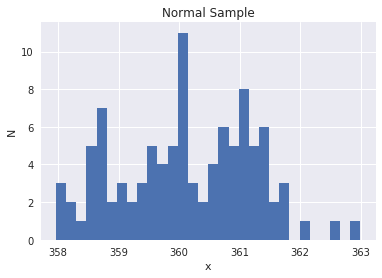

In [12]:
np.random.seed(355)
md2 = {}
md2['normal'] = np.random.normal(df, size=100)
plt.hist(md2['normal'], bins = 30)
plt.ylabel('N')
plt.xlabel('x')
plt.title ('Normal Sample')
plt.show()

# Figure 4: Normal distribution: mean = 360, N=100
This figure does not assemble a normal distribution as much. Although the mean, which is 360, lies in the middle of the graph. The distribution N does peak there. A sample size of 100 doesn't show a normal distribution of data quite well on the graph as the Central Limit Theorem and the Law of Large Numbers suggest. However, I also tested a sample size of 10000, which resembles a very nice normal distribution shape. 

In [13]:
print ("Normal mean: %.2f, standard deviation: %.2f"%(md2['normal'].mean(), md2['normal'].std()))

Normal mean: 360.13, standard deviation: 1.09


In [14]:
size = (2000 / (np.array(range(1, 101)))).astype(int)
print (size, size.shape)

[2000 1000  666  500  400  333  285  250  222  200  181  166  153  142  133
  125  117  111  105  100   95   90   86   83   80   76   74   71   68   66
   64   62   60   58   57   55   54   52   51   50   48   47   46   45   44
   43   42   41   40   40   39   38   37   37   36   35   35   34   33   33
   32   32   31   31   30   30   29   29   28   28   28   27   27   27   26
   26   25   25   25   25   24   24   24   23   23   23   22   22   22   22
   21   21   21   21   21   20   20   20   20   20] (100,)


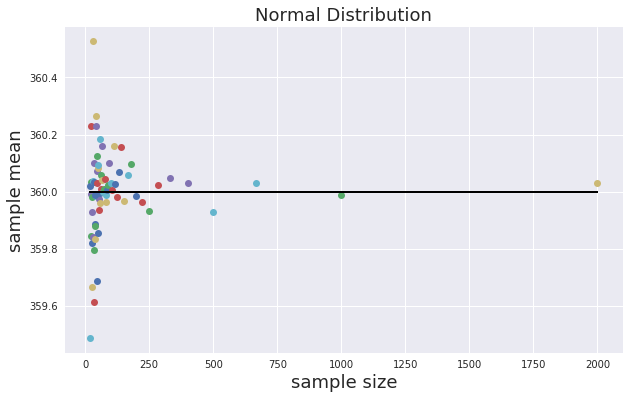

In [15]:
md2['normal'] = {} 


for n in size:
    md2['normal'][n] = np.random.normal(df, size = n)
    
md2['normal']['means'] = {}
axnormal_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md2['normal']:
    if not type(nn) == str:
        md2['normal']['means'][nn] = md2['normal'][nn].mean()
        #and plot it
        axnormal_mu_n.plot(nn, md2['normal']['means'][nn], 'o')
        axnormal_mu_n.set_xlabel('sample size', fontsize=18)
        axnormal_mu_n.set_ylabel('sample mean', fontsize=18)
        axnormal_mu_n.set_title('Normal Distribution', fontsize=18)
        axnormal_mu_n.plot([min(size), max(size)], [df, df], 'k')
plt.show()

# Figure 5: Normal distribution: mean = 360, N=100, with different sample sizes
This figure does assemble a normal distribution. The mean, which is 360, lies in the middle of the graph. The distribution scatters around there as the central limit theorem suggests.

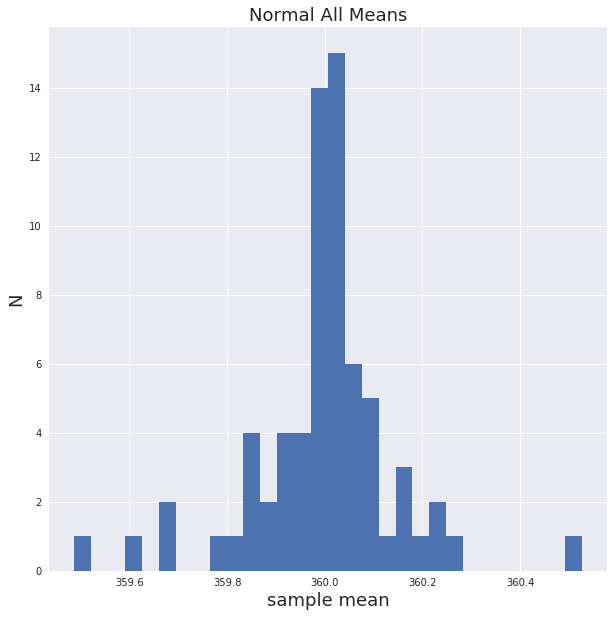

In [16]:

allmeans = list(md2['normal']['means'].values())

plt.figure(figsize=(10, 10))
plt.hist(allmeans,bins=30)
plt.xlabel('sample mean', fontsize = 18)
plt.ylabel('N', fontsize = 18)
plt.title('Normal All Means', fontsize = 18)
plt.show()

# Figure 6: Normal all means = 360, N=100
This figure does pretty much assemble a normal distribution. The mean, which is 360, lies in the middle of the graph. The distribution N peaks there as well. They now display a normal distribution of data on the graph as the Central Limit Theorem and the Law of Large Numbers suggest, though not very nicely. Particulary notice the peak of N at the mean.

# Poisson distribution

In [17]:
##your code here...
#distributions = ['pois', 'gaus', 'chisq', 'cauchy', 'lnorm', 'binomial']
distributions = ['pois']
np.random.seed(355)
df = mean
mean = 360

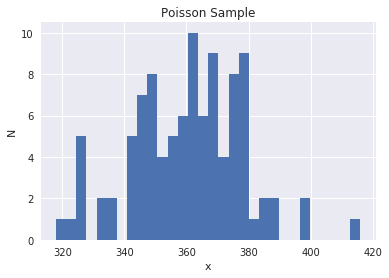

In [18]:
np.random.seed(355)
md3 = {}
md3['poisson'] = np.random.poisson(df, size=100)
pl.hist(md3['poisson'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')
plt.title ('Poisson Sample')
plt.show()

# Figure 7: Poisson distribution: mean = 360, N=100
This figure does not assemble a normal distribution as much. Although the mean, which is 360, lies in the middle of the graph. The distribution N does peak there. A sample size of 100 doesn't show a normal distribution of data quite well on the graph as the Central Limit Theorem and the Law of Large Numbers suggest. However, I also tested a sample size of 10000, which resembles a very nice normal distribution shape. Though the width of peak, is very smooth in the middle.

In [19]:
# Calculate the population mean
print ("Poisson mean: %.2f, standard deviation: %.2f"%(md3['poisson'].mean(), md3['poisson'].std()))

Poisson mean: 360.43, standard deviation: 17.73


In [20]:
size = (2000 / (np.array(range(1, 101)))).astype(int)
print (size, size.shape)

[2000 1000  666  500  400  333  285  250  222  200  181  166  153  142  133
  125  117  111  105  100   95   90   86   83   80   76   74   71   68   66
   64   62   60   58   57   55   54   52   51   50   48   47   46   45   44
   43   42   41   40   40   39   38   37   37   36   35   35   34   33   33
   32   32   31   31   30   30   29   29   28   28   28   27   27   27   26
   26   25   25   25   25   24   24   24   23   23   23   22   22   22   22
   21   21   21   21   21   20   20   20   20   20] (100,)


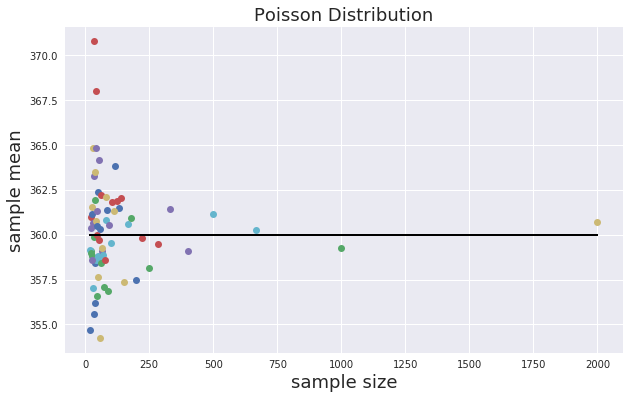

In [21]:
md3['poisson'] = {} 


for n in size:
    md3['poisson'][n] = np.random.poisson(df, size = n)
    
md3['poisson']['means'] = {}
axpoisson_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md3['poisson']:
    if not type(nn) == str:
        md3['poisson']['means'][nn] = md3['poisson'][nn].mean()
        #and plot it
        axpoisson_mu_n.plot(nn, md3['poisson']['means'][nn], 'o')
        axpoisson_mu_n.set_xlabel('sample size', fontsize=18)
        axpoisson_mu_n.set_ylabel('sample mean', fontsize=18)
        axpoisson_mu_n.set_title('Poisson Distribution', fontsize=18)
        axpoisson_mu_n.plot([min(size), max(size)], [df, df], 'k')
plt.show()

# Figure 8: Poisson distribution: mean = 360, N=100, with different sample sizes
This figure does assemble a normal distribution. The mean, which is 360, lies in the middle of the graph. The distribution scatters around there as the central limit theorem suggests.

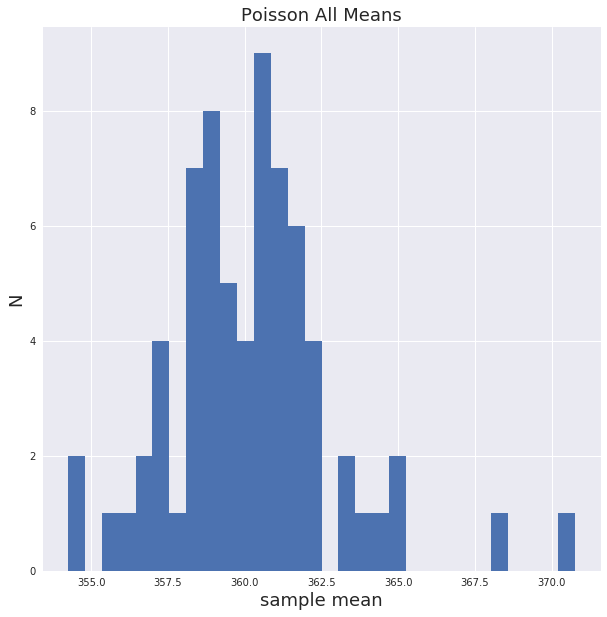

In [22]:
allmeans = list(md3['poisson']['means'].values())

plt.figure(figsize=(10, 10))
plt.hist(allmeans,bins=30)
plt.xlabel('sample mean', fontsize = 18)
plt.ylabel('N', fontsize = 18)
plt.title('Poisson All Means', fontsize = 18)
plt.show()

# Figure 9: Poisson all means = 360, N=100
This figure does pretty much assemble a normal distribution. The mean, which is 360, lies in the middle of the graph. The distribution N peaks does not there somehow. They now display a normal distribution of data on the graph as the Central Limit Theorem and the Law of Large Numbers suggest, though not very nicely. Particulary notice the peak of N at the mean is very anticlimatic.

# Binomial distribution

In [23]:
#distributions = ['pois', 'gaus', 'chisq', 'cauchy', 'lnorm', 'binomial']
distributions = ['binomial']
np.random.seed(355)
df = mean
mean = 360

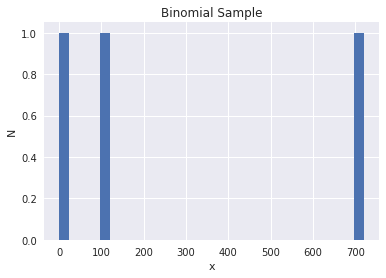

In [24]:
np.random.seed(355)
md4= {}
md4['binomial'] = (df*2, 0.5, 100)
plt.hist(md4['binomial'], bins = 30)
plt.ylabel('N')
plt.xlabel('x')
plt.title ('Binomial Sample')
plt.show()

# Figure 10: Binomial distribution: mean = 360, N=100
This figure does not assemble a normal distribution at all. Although the mean, which is 360, lies in the middle of the graph. The distribution N does exist there. A sample size of 100 doesn't show a normal distribution of data quite well on the graph as the Central Limit Theorem and the Law of Large Numbers suggest. 

In [25]:
# Calculate the population mean
np.random.seed(355)
p = 0.5
n = 720
print ("Binomial mean: %.2f, standard deviation: %.2f"%(np.random.binomial(n,p,100).mean(), np.random.binomial(n,p,100).std()))

Binomial mean: 359.50, standard deviation: 12.34


In [26]:
size = (2000 / (np.array(range(1, 101)))).astype(int)
print (size, size.shape)

[2000 1000  666  500  400  333  285  250  222  200  181  166  153  142  133
  125  117  111  105  100   95   90   86   83   80   76   74   71   68   66
   64   62   60   58   57   55   54   52   51   50   48   47   46   45   44
   43   42   41   40   40   39   38   37   37   36   35   35   34   33   33
   32   32   31   31   30   30   29   29   28   28   28   27   27   27   26
   26   25   25   25   25   24   24   24   23   23   23   22   22   22   22
   21   21   21   21   21   20   20   20   20   20] (100,)


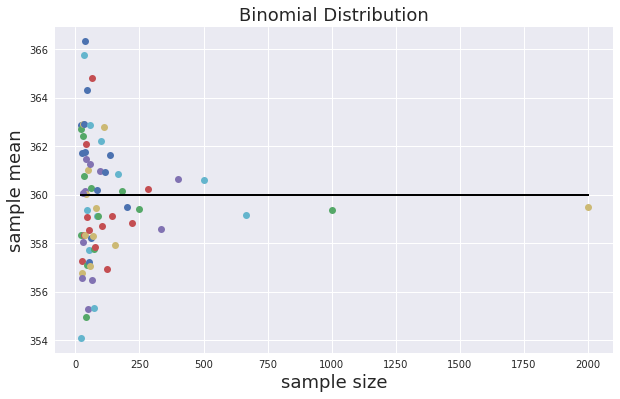

In [27]:


md4['binomial'] = {} 


for n in size:
    md4['binomial'][n] = 2*(np.random.binomial(df,p, size = n))
    

md4['binomial']['means'] = {}
binomial_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md4['binomial']:
    if not type(nn) == str:
        md4['binomial']['means'][nn] = md4['binomial'][nn].mean()
        #and plot it
        binomial_mu_n.plot(nn, md4['binomial']['means'][nn], 'o')
        binomial_mu_n.set_xlabel('sample size', fontsize=18)
        binomial_mu_n.set_ylabel('sample mean', fontsize=18)
        binomial_mu_n.set_title('Binomial Distribution', fontsize=18)
        binomial_mu_n.plot([min(size), max(size)], [df, df], 'k')

# Figure 11: Binomial distribution: mean = 360, N=100, with different sample sizes
This figure does assemble a normal distribution. The mean, which is 360, lies in the middle of the graph. The distribution scatters around there as the central limit theorem suggests.

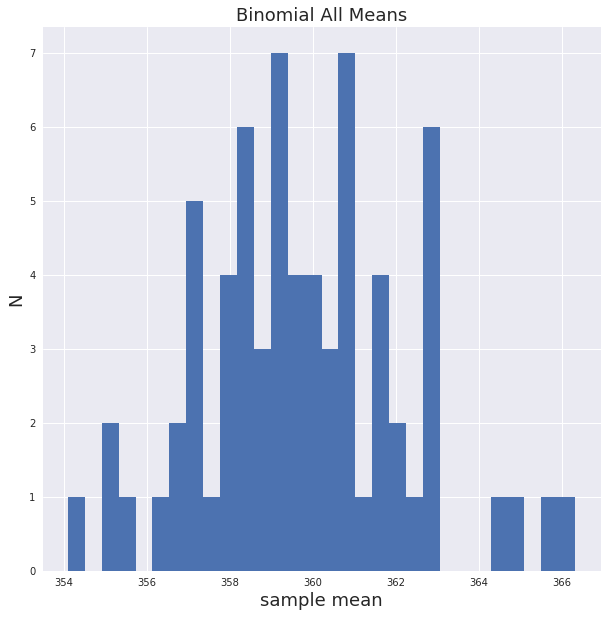

In [28]:
allmeans = list(md4['binomial']['means'].values())

plt.figure(figsize=(10, 10))
plt.hist(allmeans,bins=30)
plt.xlabel('sample mean', fontsize = 18)
plt.ylabel('N', fontsize = 18)
plt.title('Binomial All Means', fontsize = 18)
plt.show()

# Figure 12: Binomial all means = 360, N=100
This figure does pretty much assemble a normal distribution. The mean, which is 360, lies in the middle of the graph. They now display a normal distribution of data on the graph as the Central Limit Theorem and the Law of Large Numbers suggest, though not very nicely. Particulary notice the peak of N at the mean is very anticlimatic.

# Logistic distribution

In [29]:
distributions = ['logistic']
np.random.seed(355)
df = mean
mean = 360

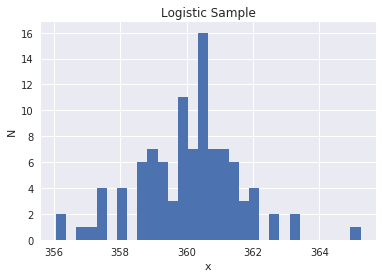

In [30]:
#HistogramNormal distribution population with mean 360
np.random.seed(355)
md5 = {}
md5['logistic'] = np.random.logistic(df, size=100)
plt.hist(md5['logistic'], bins = 30)
plt.ylabel('N')
plt.xlabel('x')
plt.title('Logistic Sample')
plt.show()

# Figure 13: Logistic distribution: mean = 360, N=100
This figure does assemble a normal distribution. Although the mean, which is 360, lies in the middle of the graph. The distribution N does exist there. A sample size of 100 shows a normal distribution of data to certain extent on the graph as the Central Limit Theorem and the Law of Large Numbers suggest. 

In [31]:
# Calculate the population mean
print ("Normal mean: %.2f, standard deviation: %.2f"%(md5['logistic'].mean(), md5['logistic'].std()))

Normal mean: 360.08, standard deviation: 1.52


In [32]:
size = (2000 / (np.array(range(1, 101)))).astype(int)
print (size, size.shape)

[2000 1000  666  500  400  333  285  250  222  200  181  166  153  142  133
  125  117  111  105  100   95   90   86   83   80   76   74   71   68   66
   64   62   60   58   57   55   54   52   51   50   48   47   46   45   44
   43   42   41   40   40   39   38   37   37   36   35   35   34   33   33
   32   32   31   31   30   30   29   29   28   28   28   27   27   27   26
   26   25   25   25   25   24   24   24   23   23   23   22   22   22   22
   21   21   21   21   21   20   20   20   20   20] (100,)


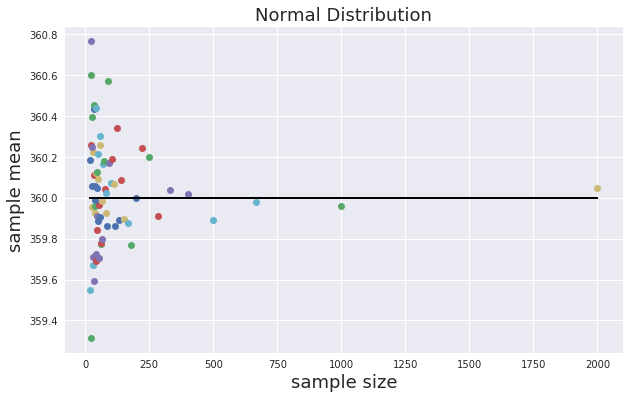

In [33]:
md5['logistic'] = {} 


for n in size:
    md5['logistic'][n] = np.random.logistic(df, size = n)
    


md5['logistic']['means'] = {}
axlogistic_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md5['logistic']:
    if not type(nn) == str:
        md5['logistic']['means'][nn] = md5['logistic'][nn].mean()
        #and plot it
        axlogistic_mu_n.plot(nn, md5['logistic']['means'][nn], 'o')
        axlogistic_mu_n.set_xlabel('sample size', fontsize=18)
        axlogistic_mu_n.set_ylabel('sample mean', fontsize=18)
        axlogistic_mu_n.set_title('Normal Distribution', fontsize=18)
        axlogistic_mu_n.plot([min(size), max(size)], [df, df], 'k')
plt.show()

# Figure 14: Logistic distribution: mean = 360, N=100, with different sample sizes
This figure does assemble a normal distribution. The mean, which is 360, lies in the middle of the graph. The distribution scatters around there as the central limit theorem suggests.

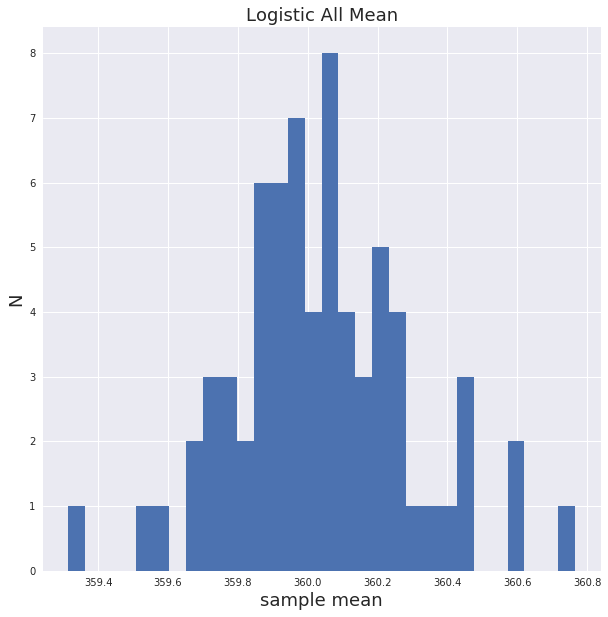

In [34]:
allmeans = list(md5['logistic']['means'].values())

plt.figure(figsize=(10, 10))
plt.hist(allmeans,bins=30)
plt.xlabel('sample mean', fontsize = 18)
plt.ylabel('N', fontsize = 18)
plt.title('Logistic All Mean', fontsize = 18)
plt.show()

# Figure 15: Logistic all means = 360, N=100
This figure does pretty much assemble a normal distribution. The mean, which is 360, lies in the middle of the graph. They now display a normal distribution of data on the graph as the Central Limit Theorem and the Law of Large Numbers suggest, though not very nicely. 